In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r'C:\Users\princ\OneDrive\2025\Machine Learning\data\loan_sanction_train.csv')

In [4]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


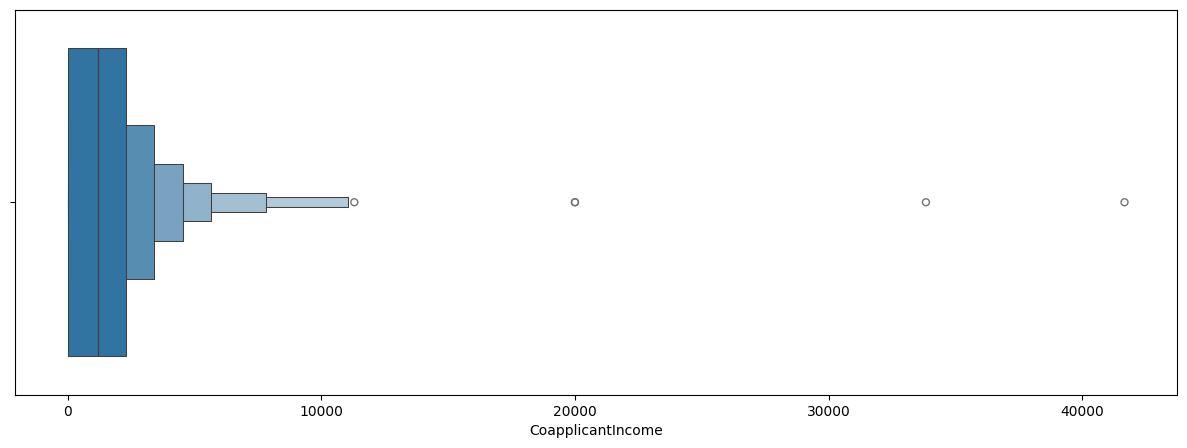

In [11]:
plt.figure(figsize=(15,5))
sns.boxenplot(x = "CoapplicantIncome", data = dataset)
plt.show()

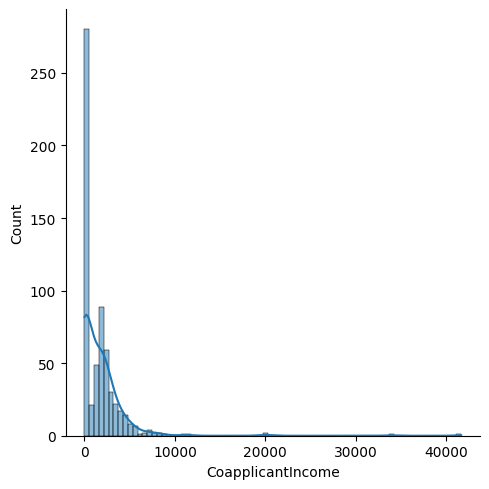

In [17]:
sns.displot(dataset["CoapplicantIncome"],kde = True)
plt.show()

In [19]:
dataset.shape

(614, 13)

In [24]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q1

np.float64(0.0)

In [27]:
q3 = dataset["CoapplicantIncome"].quantile(0.75)
q3

np.float64(2297.25)

In [35]:
IQR= q3 - q1

In [36]:
min_range = q1 - (1.5*IQR)
min_range

np.float64(-3445.875)

In [37]:
max_range = q3 + (1.5*IQR)
max_range

np.float64(5743.125)

In [41]:
new_dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

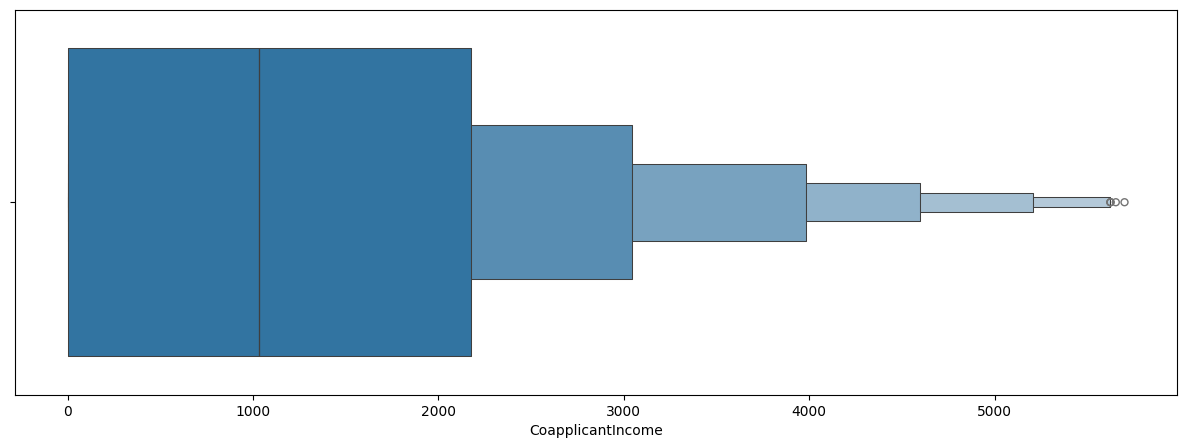

In [43]:
plt.figure(figsize=(15,5))
sns.boxenplot(x = "CoapplicantIncome", data = new_dataset)
plt.show()

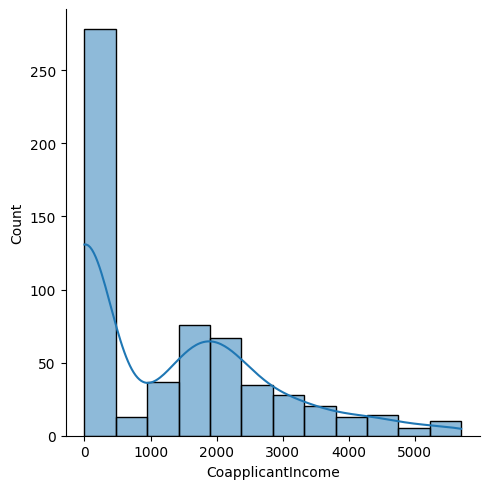

<Figure size 2500x500 with 0 Axes>

In [49]:
sns.displot(new_dataset["CoapplicantIncome"],kde = True)
plt.show()

In [50]:
#Direct Methods
min_range = dataset["CoapplicantIncome"].mean()-(3*dataset["CoapplicantIncome"].std())
min_range

np.float64(-7157.4993096454655)

In [52]:
max_range = dataset["CoapplicantIncome"].mean()+(3*dataset["CoapplicantIncome"].std())
max_range

np.float64(10399.990905699668)

In [59]:
new_dataset1 =dataset[ dataset["CoapplicantIncome"]<= max_range]

In [62]:
new_dataset1.shape

(608, 13)

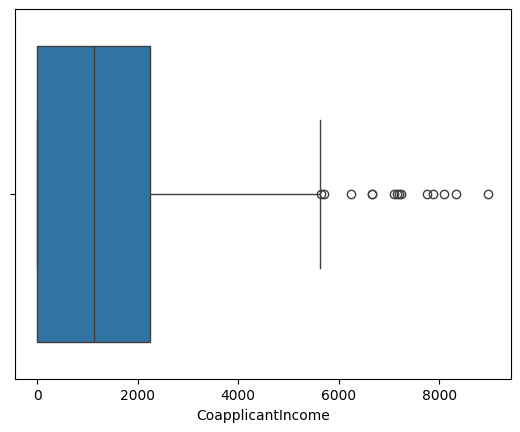

In [60]:
sns.boxplot(x = "CoapplicantIncome", data = new_dataset1)
plt.show()

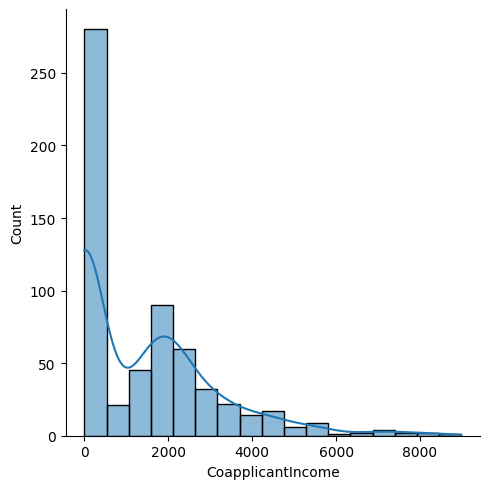

In [67]:
sns.displot(new_dataset1["CoapplicantIncome"],kde = True)
plt.show()

In [63]:
z_score = (dataset["CoapplicantIncome"] - dataset["CoapplicantIncome"].mean())/dataset["CoapplicantIncome"].std()
z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [64]:
new_dataset2 = dataset[(z_score<3)]

In [65]:
new_dataset2.shape

(608, 13)

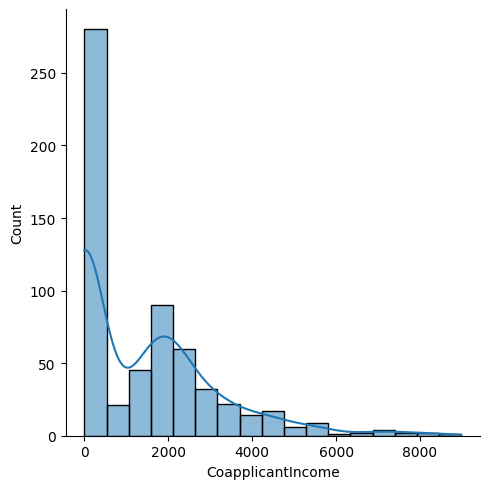

In [66]:
sns.displot(new_dataset2["CoapplicantIncome"],kde = True)
plt.show()